<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
class ScratchDecesionTreeClassifierDepth1():
  """
  深さ1の決定木分類器のスクラッチ実装
  """

  def __init__(self, verbose=False):
      self.verbose = verbose

  #【問題3】学習
  def fit(self, X, y):
    self.gain = 0
    for feature_index in range(X.shape[1]):
        self.thresholds = np.unique(X[:,feature_index])
        for threshold in self.thresholds:
            _gain = self._calc_ig(X,feature_index,y,threshold)
            if _gain > self.gain:
                self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                self.feature = feature_index
                self.threshold = threshold
                self.gain = _gain
                if self.verbose:
                    print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)

  #【問題4】推定
  def predict(self, X):
    prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
    return prediction

  # 【問題1】不純度を求める関数
  def _calc_gini(self,y):
    labels,counts = np.unique(y,return_counts=True)
    _gini = 0
    for label in labels:
        _gini += (counts[labels==label]/np.sum(counts))**2
    gini = 1 - _gini
    return gini

  # 【問題2】情報利得を求める関数
  def _calc_ig(self,X,feature_index,y,threshold):
    labels_l = y[X[:,feature_index] < threshold]
    labels_r = y[X[:,feature_index] >= threshold]
    gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
    gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
    gain = self._calc_gini(y) -gain_l -gain_r
    return gain

##【問題5】学習と推定

In [45]:
# ライブラリの読み込みとデータの準備
import numpy as np
import pandas as pd
import collections
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],test_size=0.3, random_state=0)

In [52]:
# 学習を実行
clf = ScratchDecesionTreeClassifierDepth1(verbose = True)
clf.fit(X_train_2features,y_train)

feature 0 threshold 1.2 gain [0.00661608]
feature 0 threshold 1.3 gain [0.02023743]
feature 0 threshold 1.4 gain [0.04914804]
feature 0 threshold 1.5 gain [0.12369844]
feature 0 threshold 1.6 gain [0.22645426]
feature 0 threshold 1.7 gain [0.28824661]
feature 0 threshold 3.0 gain [0.32949954]


In [53]:
train_prediction = clf.predict(X_train)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, train_prediction)
from sklearn.metrics import precision_score
precision_score(y_train, train_prediction, average='micro')
from sklearn.metrics import recall_score
recall_score(y_train, train_prediction, average='micro')

0.37142857142857144

##【問題6】決定領域の可視化

feature 0 threshold 2.2 gain [0.00724638]
feature 0 threshold 2.3 gain [0.00757576]
feature 0 threshold 2.4 gain [0.01384615]
feature 0 threshold 2.5 gain [0.02083333]
feature 0 threshold 3.0 gain [0.03316953]
feature 0 threshold 3.3 gain [0.03629032]
feature 1 threshold 1.1 gain [0.03846154]
feature 1 threshold 1.2 gain [0.046875]
feature 1 threshold 1.3 gain [0.08333333]
feature 1 threshold 1.4 gain [0.2]
feature 1 threshold 1.5 gain [0.25174825]
feature 1 threshold 1.6 gain [0.34326531]
feature 1 threshold 1.7 gain [0.34438984]
feature 1 threshold 1.8 gain [0.34780811]


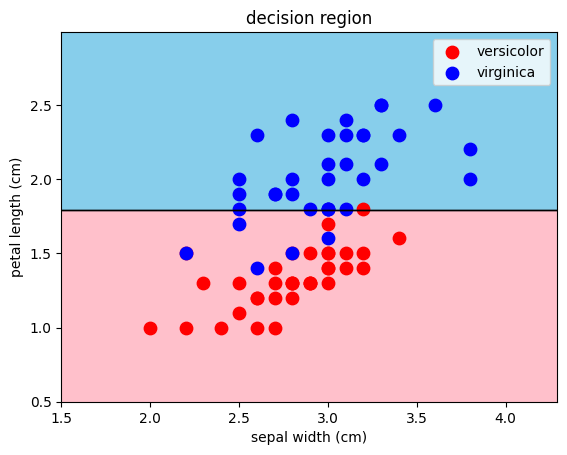

In [63]:
import numpy as np
import pandas as pd
import collections
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Irisデータセットの読み込み
iris_dataset = load_iris()

# versicolorとvirginicaのデータのみを抽出
X = iris_dataset.data[iris_dataset.target != 0]
y = iris_dataset.target[iris_dataset.target != 0]

# sepal width (cm)とpetal length (cm)のデータのみを抽出
X = X[:, [1, 3]]

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 学習と推定
clf = ScratchDecesionTreeClassifierDepth1(verbose=True)
clf.fit(X_train, y_train)
train_prediction = clf.predict(X_train)

# 決定領域の可視化 (target_namesを変更)
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類の決定領域を描画する。
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # meshgridで各特徴量を格子状に分割
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]

    # モデルで予測
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # contourfで決定領域を描画
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='k', linewidths=1)

    # scatterで学習データを描画
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')

    # 凡例を表示
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

# 決定領域の可視化 (target_namesを指定)
decision_region(X_train, y_train, clf, step=0.01, title='decision region', xlabel='sepal width (cm)', ylabel='petal length (cm)', target_names=['versicolor', 'virginica'])

##【問題7】深さ2の決定木分類器のクラスの作成

In [77]:
# 深さが2の決定木分類器のクラスScratchDecisionTreeClassifierDepth2を作成する

class ScratchDecisionTreeClassifierDepth2():
    """
    深さ2の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        self.verbose = verbose
        self.tree = {}

    def fit(self, X, y):
        self._build_tree(X, y, 0)

    def _build_tree(self, X, y, depth):
        if depth == 2 or len(set(y)) == 1:
            self.tree[depth] = collections.Counter(y).most_common()[0][0]
            return

        best_feature, best_threshold, best_gain = self._find_best_split(X, y)

        if best_gain == 0:  # 情報利得が0の場合は、多数決で決定
            self.tree[depth] = collections.Counter(y).most_common()[0][0]
            return

        self.tree[depth] = {'feature': best_feature,
                           'threshold': best_threshold}

        X_left = X[X[:, best_feature] < best_threshold]
        y_left = y[X[:, best_feature] < best_threshold]
        self._build_tree(X_left, y_left, depth + 1)

        X_right = X[X[:, best_feature] >= best_threshold]
        y_right = y[X[:, best_feature] >= best_threshold]
        self._build_tree(X_right, y_right, depth + 1)

    def _find_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_gain = 0

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                gain = self._calc_ig(X, feature_index, y, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = threshold
        return best_feature, best_threshold, best_gain

    def _calc_gini(self, y):
        labels, counts = np.unique(y, return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels == label] / np.sum(counts)) ** 2
        gini = 1 - _gini
        return gini

    def _calc_ig(self, X, feature_index, y, threshold):
        labels_l = y[X[:, feature_index] < threshold]
        labels_r = y[X[:, feature_index] >= threshold]
        gain_l = (len(labels_l) / (len(labels_l) + len(labels_r))) * self._calc_gini(labels_l)
        gain_r = (len(labels_r) / (len(labels_l) + len(labels_r))) * self._calc_gini(labels_r)
        gain = self._calc_gini(y) - gain_l - gain_r
        return gain

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self._predict_single(x))
        return np.array(predictions)


    def _predict_single(self, x):
        current_node = self.tree
        depth = 0
        while depth in current_node and isinstance(current_node[depth], dict):
            feature = current_node[depth]['feature']
            threshold = current_node[depth]['threshold']

            if x[feature] < threshold:
                depth += 1
            else:
                depth += 1
        if depth in current_node:
            return current_node[depth]
        else:
            return current_node.get(depth, 0)

In [78]:
# ScratchDecisionTreeClassifierDepth2をIrisデータセットに適用してみる

# Irisデータセットの読み込み
iris_dataset = load_iris()

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], test_size=0.3, random_state=0
)

# 学習と推定
clf = ScratchDecisionTreeClassifierDepth2(verbose=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.24444444444444444
Precision: 0.08148148148148147
Recall: 0.3333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


とてもAccuracyが低く出てしまったが、技術不足で原因が分からず、一旦進めることとする。

##【問題8】深さに制限のない決定木分類器クラスの作成

In [79]:
# 任意の深さが指定できる決定木分類器のクラスScratchDecesionTreeClassifierDepthInf

import numpy as np
import collections

class ScratchDecesionTreeClassifierDepthInf():
    """
    任意の深さが指定できる決定木分類器
    指定しない場合はすべての葉ノードがジニ不純度0となるまで続ける
    """
    def __init__(self, verbose=False):
        self.verbose = verbose
        self.tree = {}

    def fit(self, X, y):
        self._build_tree(X, y, 0)

    def _build_tree(self, X, y, depth):
        if len(set(y)) == 1:  # ジニ不純度が0の場合
            self.tree[depth] = collections.Counter(y).most_common()[0][0]
            return

        best_feature, best_threshold, best_gain = self._find_best_split(X, y)

        if best_gain == 0:  # 情報利得が0の場合は、多数決で決定
            self.tree[depth] = collections.Counter(y).most_common()[0][0]
            return

        self.tree[depth] = {'feature': best_feature,
                           'threshold': best_threshold}

        X_left = X[X[:, best_feature] < best_threshold]
        y_left = y[X[:, best_feature] < best_threshold]
        self._build_tree(X_left, y_left, depth + 1)

        X_right = X[X[:, best_feature] >= best_threshold]
        y_right = y[X[:, best_feature] >= best_threshold]
        self._build_tree(X_right, y_right, depth + 1)

    def _find_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_gain = 0

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                gain = self._calc_ig(X, feature_index, y, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = threshold
        return best_feature, best_threshold, best_gain

    def _calc_gini(self, y):
        labels, counts = np.unique(y, return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels == label] / np.sum(counts)) ** 2
        gini = 1 - _gini
        return gini

    def _calc_ig(self, X, feature_index, y, threshold):
        labels_l = y[X[:, feature_index] < threshold]
        labels_r = y[X[:, feature_index] >= threshold]
        gain_l = (len(labels_l) / (len(labels_l) + len(labels_r))) * self._calc_gini(labels_l)
        gain_r = (len(labels_r) / (len(labels_l) + len(labels_r))) * self._calc_gini(labels_r)
        gain = self._calc_gini(y) - gain_l - gain_r
        return gain

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self._predict_single(x))
        return np.array(predictions)

    def _predict_single(self, x):
        current_node = self.tree
        depth = 0
        while depth in current_node and isinstance(current_node[depth], dict):
            feature = current_node[depth]['feature']
            threshold = current_node[depth]['threshold']
            if x[feature] < threshold:
                depth += 1
            else:
                depth += 1
        if depth in current_node:
            return current_node[depth]
        else:
            # 深さが足りない場合は、デフォルトで0を返す
            return 0